In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d
from scipy.special import legendre

In [2]:
from GaussianCovariance import *

In [3]:
# Read the input power spectrum
k_array, pk_array = np.genfromtxt("pk.dat", unpack=True)

# Interpolate the power spectrum
interp_pk = interp1d(k_array, pk_array)

In [4]:
# Set the survey parameters
volume = 1500**3
number_density = 1

In [5]:
# Set the clustering model
b1 = 2
f = 0.8
beta = f/b1

p_k_mu = lambda k, mu : (b1 + f * mu**2) **2 * interp_pk(k)

In [6]:
# Set the power spectrum multipoles grid
n_bins_k = 20
k_min = 1.e-2
k_max = 5.e-1

# edges of the wave vector bins
k_edges = np.logspace(np.log10(k_min), np.log10(k_max), n_bins_k+1, base=10)

# wave vector bins
k_bins = np.array([0.5 * (k_edges[i+1]+k_edges[i]) for i in range(n_bins_k)])

# List of the multipoles
l_list = [0, 2, 4]

In [7]:
# Compute the power spectrum multipoles (optional)
mu, weights = np.polynomial.legendre.leggauss(deg=51)

p_k_l = {}
for ll in l_list:
    leg = legendre(ll)(mu)
    p_k_l[ll] = 0.5 * (2*ll+1) * np.array([np.sum(weights * p_k_mu(k, mu) * leg)  for k in k_bins])

In [8]:
# Compute the covariance
covariance = PowerSpectrumGaussianCovariance(k_edges, l_list, deg=51)(p_k_mu, volume, number_density)

In [9]:
# Compute the standard deviation
std = np.sqrt(np.diagonal(covariance))

# Compute the correlation matrix
corr = covariance/np.outer(std, std)

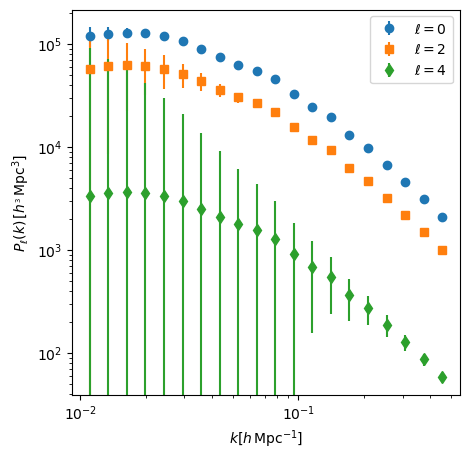

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xscale("log")
ax.set_yscale("log")

ax.errorbar(k_bins, p_k_l[0], yerr=std[0:n_bins_k], fmt="o", label=r"$\ell = 0$")
ax.errorbar(k_bins, p_k_l[2], yerr=std[n_bins_k:2*n_bins_k], fmt="s", label=r"$\ell = 2$")
ax.errorbar(k_bins, p_k_l[4], yerr=std[2*n_bins_k:], fmt="d", label=r"$\ell = 4$")

ax.set_xlabel(r"$k [h \, \mathrm{Mpc}^{-1}]$")
ax.set_ylabel(r"$P_{\ell}(k) \, [h^{_3} \, \mathrm{Mpc}^{3}]$");
ax.legend(loc="best")

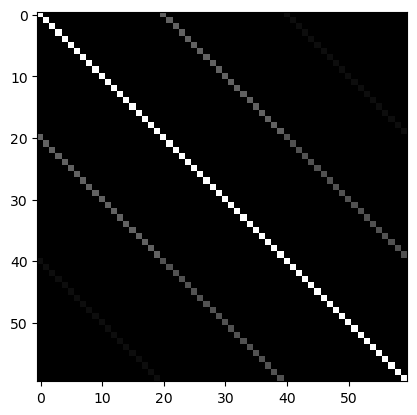

In [11]:
# Plot the correlation matrix

plt.imshow(corr, cmap=plt.cm.binary_r)

In [12]:
rad_edges = np.linspace(0, 200, 41)

In [13]:
r_bins = (rad_edges[:-1] + rad_edges[1:] ) * 0.5

In [14]:
xi_covariance = TwoPointGaussianCovariance(rad_edges, l_list, deg=51, deg_k=10)

1025
Computing Bessels functions...
Done!


In [15]:
print(xi_covariance.k)

[1.00000000e-04 1.01130653e-04 1.02274090e-04 ... 9.77764747e+00
 9.88819876e+00 1.00000000e+01]


In [16]:
cov = xi_covariance(p_k_mu, volume, number_density)

Computing tabulated sigma squared...
Done!


In [17]:
std = np.sqrt(np.diagonal(cov))
corr = cov/np.outer(std,std)

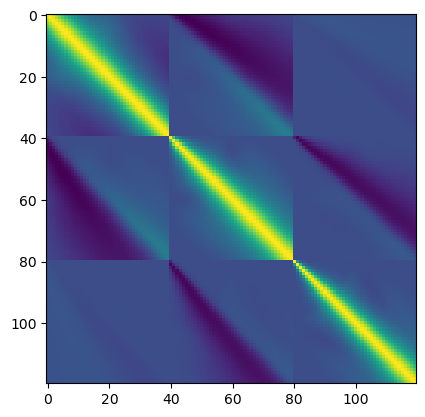

In [18]:
plt.imshow(corr)